In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
import string
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


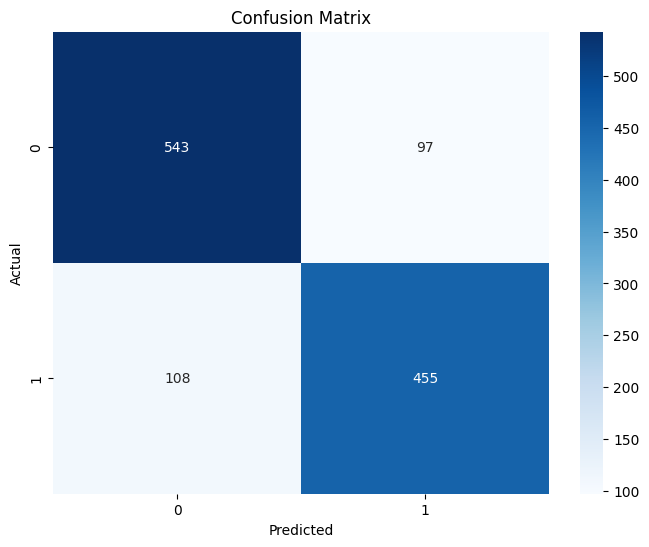

Accuracy: 82.95926849542809
Precision: 82.42753623188406
Recall: 80.81705150976909


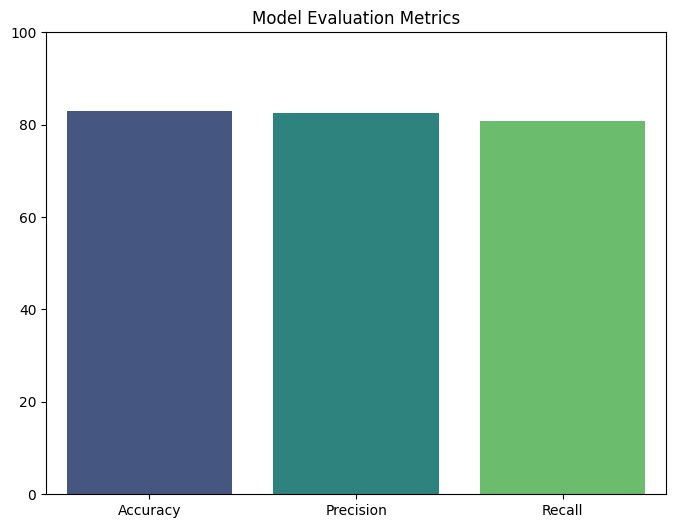

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
import string
import re

def train_and_evaluate_model(x_train, y_train, x_test, y_test):
    vectorization = TfidfVectorizer(ngram_range=(1, 3), stop_words='english')
    xv_train = vectorization.fit_transform(x_train)
    xv_test = vectorization.transform(x_test)

    LR = LogisticRegression()
    LR.fit(xv_train, y_train)
    score1 = LR.score(xv_test, y_test)
    pred_lr = LR.predict(xv_test)
    precision1 = precision_score(y_test, pred_lr) * 100
    recall1 = recall_score(y_test, pred_lr) * 100
    
    cm = confusion_matrix(y_test, pred_lr)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    return score1 * 100, precision1, recall1

def plot_metrics(accuracy, precision, recall):
    labels = ['Accuracy', 'Precision', 'Recall']
    values = [accuracy, precision, recall]

    plt.figure(figsize=(8, 6))
    sns.barplot(x=labels, y=values, palette='viridis')
    plt.title('Model Evaluation Metrics')
    plt.ylim([0, 100])
    plt.show()

def preprocess_text(text):
    ps = PorterStemmer()  # Define PorterStemmer here
    text = text.lower()
    text = re.sub('\[.*?\]', '', text) 
    text = re.sub("@\S+", " ", text) 
    text = re.sub("#\S+", " ", text) 
    text = re.sub("\'\w+", '', text) 
    text = re.sub('\s{2,}', " ", text)
    text = text.split()
    text = [ps.stem(word) for word in text if not word in stopwords.words('english')] 
    text = ' '.join(text)
    text = re.sub("https*\S+", " ", text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub(r'\w*\d+\w*', '', text)
    return text

def main():
    nltk.download('stopwords')
    nltk.download('punkt')

    dataset = pd.read_csv("E:\data.csv")
    dataset.drop(columns=["URLs", "Body"], inplace=True, axis=1)

    dataset["Headline"] = dataset["Headline"].apply(preprocess_text)

    x = dataset["Headline"]
    y = dataset["Label"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

    score1, precision1, recall1 = train_and_evaluate_model(x_train, y_train, x_test, y_test)

    print(f"Accuracy: {score1}")
    print(f"Precision: {precision1}")
    print(f"Recall: {recall1}")
    
    plot_metrics(score1, precision1, recall1)


if __name__ == "__main__":
    main()
